# 1. Convolution

# (a) Calculate the convolution between two signals

In [0]:
def convolution(input1, input2):
  result = [0] * (len(input1) + len(input2) - 1) # create a list with the length of (N+M-1),if the length of input1 is N, the length of input2 is M
  for i in range(len(input1)):   # traverse the list1, named input1
    for j in range(len(input2)): # traverse the list2, named input2
      result[i+j] = result[i+j] + input1[i]*input2[j] 
  return result

In [54]:
input1 = [3,4,1,2,5,6,7,8,2,4]
input2 = [1/3,1/3,1/3]
convolution(input1,input2)

[1.0,
 2.333333333333333,
 2.6666666666666665,
 2.333333333333333,
 2.6666666666666665,
 4.333333333333333,
 6.0,
 7.0,
 5.666666666666667,
 4.666666666666666,
 2.0,
 1.3333333333333333]

# (b) Describe in words what this convolution does.

What this convolution does is the same as moving average. The input2, h, can be seen as a sliding window from the left to the right along with the input1, x. This convolution can calculate the average of three successive elements in the input1,x. 


# (c) Optimize the convolution from O(N^2) to O(N)

In [0]:
def optimizedConvolution(input1, input2):
  length1 = len(input1)  
  length2 = len(input2)
  result = [0] * (length1 + length2 - 1)  # create a list with the length of (N+M-1),if the length of input1 is N, the length of input2 is M
  
  h = input2[0]   # we all know that all the elements in filter h are the same, so we only extract one of them is enough
  num = 0
  
  for i in range(length2):  # First phase: from 0 to length2
    num += input1[i]        # each time will accumulate num
    result[i] = num * h     # each time will calculate the average and put the result into the result list
    
  for i in range(length2, length1): # Second phase: from length2 to length1
    num -= input1[i-length2]        # each time will minus an element at the beginning of input1
    num += input1[i]                # each time will accumulate an element from input1
    result[i] = num * h
  
  for i in range(length1,length1+length2-1):  # Third phase: from length1 to the end
    num -= input1[i-length2]
    result[i] = num*h
  return result
    

In [56]:
input1 = [3,4,1,2,5,6,7,8,2,4]
input2 = [1/3,1/3,1/3]
optimizedConvolution(input1,input2)

[1.0,
 2.333333333333333,
 2.6666666666666665,
 2.333333333333333,
 2.6666666666666665,
 4.333333333333333,
 6.0,
 7.0,
 5.666666666666666,
 4.666666666666666,
 2.0,
 1.3333333333333333]

We assume the x = [4,5,6,7,8], and h = [1/3,1/3,1/3]. We can clearly see the numerator of each element of the result has a rule. For the first phase, the numerator will accumulate one element from input1,x. For the second phase, the numerator will minus one element from the beginning of input1,x, and then accumulate one element from input1,x, again. For the third phase, the numerator will minus one element from input1,x, following the last "minus" process.                                 
                                         
                                              index 0     1           2           3           4

                                             x     4     5           6           7           8
                                            h                       1/3         1/3         1/3
                                          ----------------------------------------------------
                                                 4/3     5/3        6/3         7/3         8/3
                                         4/3     5/3     6/3        7/3         8/3 
                                 4/3     5/3     6/3     7/3        8/3
                ----------------------------------------------------------------------------------
                                4/3    (4+5)/3 (4+5+6)/3 (5+6+7)/3 (6+7+8)/3   (7+8)/3       8/3


                                0        1          2        3           4        5           6
                                |___________________|
                                                              |___________|        
                                                                                  |____________|
                                  

# (d) Show the time difference between the regular technique and the more efficient one. 

In [57]:
# import time module in python & replicate two original input
import time 

input1 = input1 * 100   # replicate 100 times the original length of input1
input2 = input2 * 100   # replicate 100 times the original length of input2

begin = time.time() 
convolution(input1, input2)
finish = time.time()
print(finish - begin)

0.07820415496826172


In [16]:
begin2 = time.time()
optimizedConvolution(input1, input2)
finish2 = time.time()
print(finish2 - begin2)


0.0005247592926025391


# 2. Matched filters with cross-correlation


/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


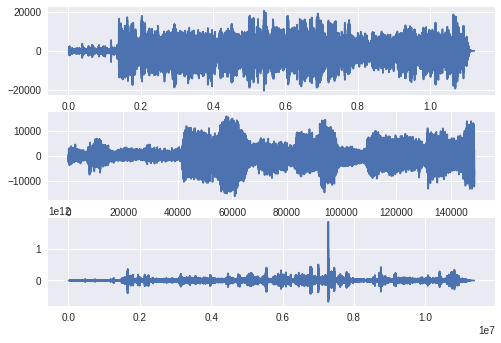

In [61]:
from scipy.io import wavfile
from scipy import signal 
import matplotlib
import matplotlib.pyplot as plt

# load the original file & convert to float
fig, data = wavfile.read('Corcovado.wav')
original1 = data[:,0].astype(float)

# load the clip file & convert to float
fig, clip = wavfile.read('clip.wav')
clip1 = clip[:,0].astype(float)

# compute the cross-correlation
correlation = signal.correlate(original1, clip1)

fig, (ax0,ax1,ax2) = plt.subplots(3, 1) # nrows = 3, ncols = 1

ax0.plot(original1)
ax1.plot(clip1)
ax2.plot(correlation)

In [69]:
peak = np.argmax(correlation)
print('The position of peak:',peak)
print('The length of array of correlation:', correlation.size)

The position of peak: 7278694
The length of array of correlation: 11369681
The length of array of Corcovado.wav: 11221103


The position of the peak is located at 7278694 / 11369681 = 0.64. 
So, we can use this number to multiply the total time of the original sounds. The total time of original sounds is 254 seconds. So, the beginning of the clip is from 254 * 0.64 = 162 second approximately. Thus, it is 2:42. 

#3. Fourier Series 

#(a) Create a regularly spaced vector t from 0 to 1 with a length of 1000 and set f to 2.

In [0]:
from math import sin, pi
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [0]:
vector = np.linspace(0,1,1000)

#(b) Write a for loop to compute the finite sum of above equation to approximate y for a given K value.

In [0]:
# The summation function has two parameters, one is a given K value, the other is f(set to 2)
from math import sin,pi 
def summation(K,f):
    multiply = 1  # variable "multiply" is the odd numbered multiplies
    sum = 0
    for i in range(1, K+1):
      sum += np.sin(2 * pi * multiply * f * vector ) / multiply 
      multiply += 2  # multiply should be odd 
      i += 1
    return sum

#(c) Generate a sine wave using the formula above i.e., K = 1 and plot the result.

Text(0.5, 1.0, 'K = 1, f = 2')

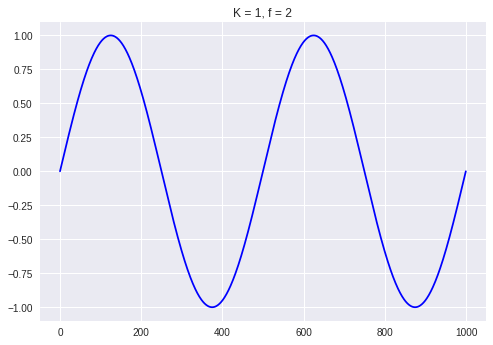

In [21]:
fig, ax = plt.subplots(1, 1) # nrows = 1, ncols = 1
Output1 = summation(1,2)
ax.plot(Output1, 'b')
ax.set_title('K = 1, f = 2')

#(d) Generate and plot y(t) with K = 3.

Text(0.5, 1.0, 'K = 3, f = 2')

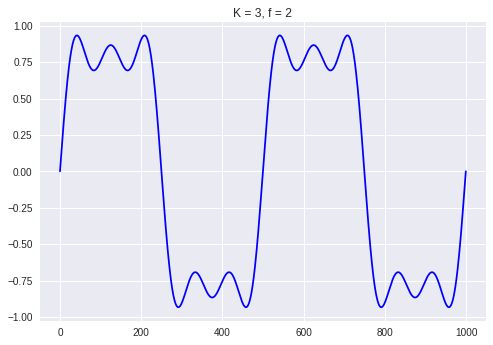

In [22]:
fig, ax = plt.subplots(1, 1) # nrows = 1, ncols = 1
Output2 = summation(3,2)
ax.plot(Output2, 'b')
ax.set_title('K = 3, f = 2')

#(e) Try with 9 and 50 sine waves.

Text(0.5, 1.0, 'K = 9, f = 2')

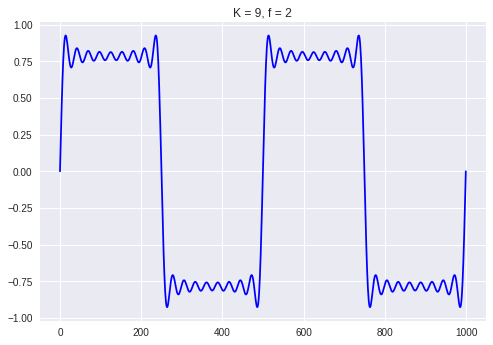

In [23]:
fig, ax = plt.subplots(1, 1) # nrows = 1, ncols = 1
Output3 = summation(9,2)
ax.plot(Output3, 'b')
ax.set_title('K = 9, f = 2')

Text(0.5, 1.0, 'K = 50, f = 2')

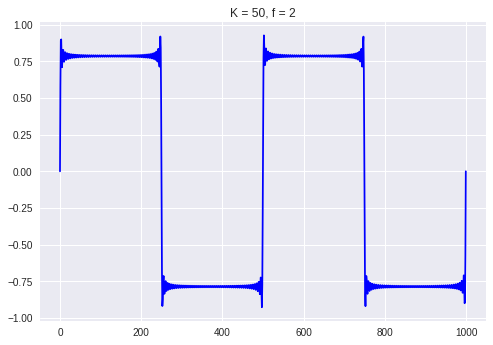

In [24]:
fig, ax = plt.subplots(1, 1) # nrows = 1, ncols = 1
Output4 = summation(50,2)
ax.plot(Output4, 'b')
ax.set_title('K = 50, f = 2')

# (f) 

# Part1: try K  = 100, K = 1000, K = 1000000

Text(0.5, 1.0, 'K = 100, f = 2')

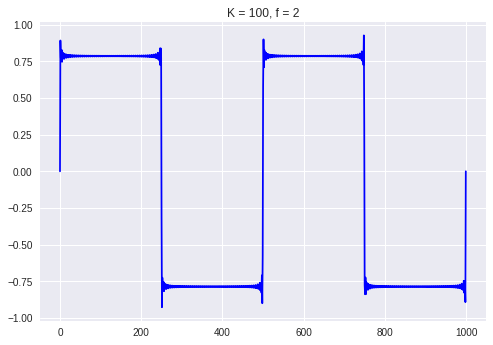

In [25]:
fig, ax = plt.subplots(1, 1) # nrows = 1, ncols = 1
Output5 = summation(100,2)
ax.plot(Output5, 'b')
ax.set_title('K = 100, f = 2')

Text(0.5, 1.0, 'K = 1000, f = 2')

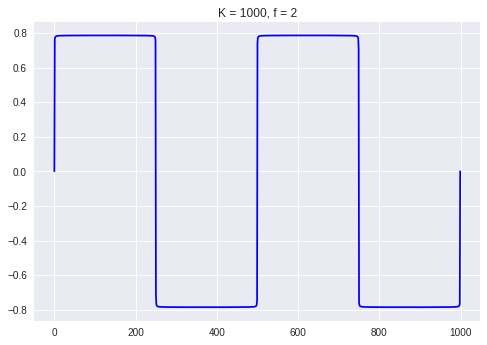

In [26]:
fig, ax = plt.subplots(1, 1) # nrows = 1, ncols = 1
Output6 = summation(1000,2)
ax.plot(Output6, 'b')
ax.set_title('K = 1000, f = 2')

Text(0.5, 1.0, 'K = 1000000, f = 2')

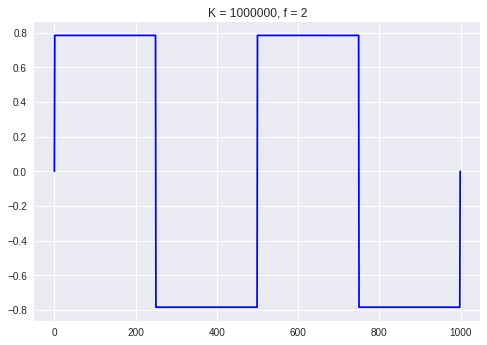

In [27]:
fig, ax = plt.subplots(1, 1) # nrows = 1, ncols = 1
Output7 = summation(1000000,2)
ax.plot(Output7, 'b')
ax.set_title('K = 1000000, f = 2')

# Part2: Zoom in with K = 1000000

Text(0.5, 1.0, 'Zoomed in, K = 1000000, f = 2')

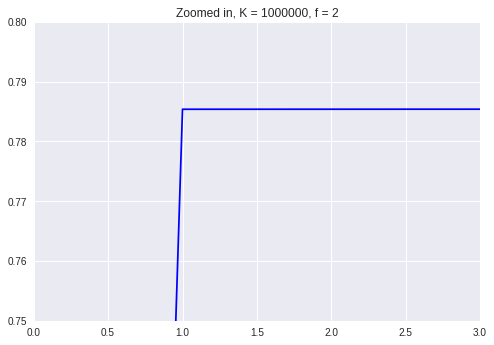

In [28]:
fig, ax = plt.subplots(1, 1) # nrows = 1, ncols = 1
Output8 = summation(1000000,2)
ax.plot(Output8, 'b')
plt.xlim([0,3])
plt.ylim([0.75,0.8])
ax.set_title('Zoomed in, K = 1000000, f = 2')

# (g) Place all the plots generated in a plot as subplots

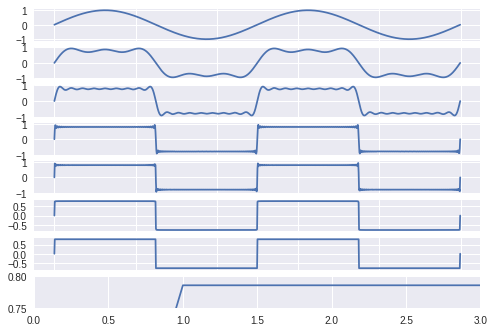

In [29]:
fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(8, 1) # nrows = 8, ncols = 1

ax0.plot(Output1)
ax1.plot(Output2)
ax2.plot(Output3)
ax3.plot(Output4)
ax4.plot(Output5)
ax5.plot(Output6)
ax6.plot(Output7)
plt.xlim([0,3])
plt.ylim([0.75,0.8])
ax7.plot(Output8)

# 4 Programming a LTI system

In [44]:
import numpy as np
n = np.linspace(0,1000,1001)
print(n)


[   0.    1.    2. ...  998.  999. 1000.]


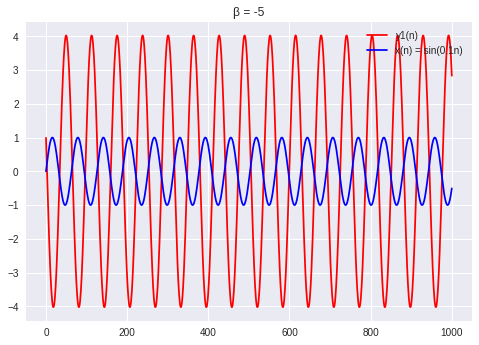

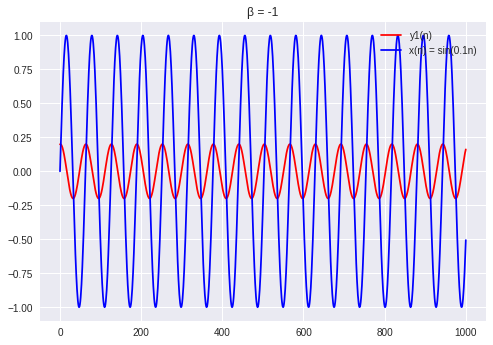

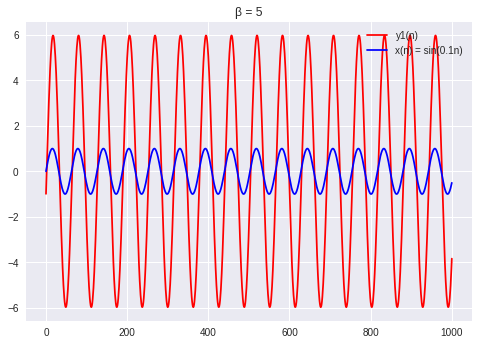

In [52]:
import numpy as np
from scipy import signal

def convolution(input1, input2):
  result = [0] * (len(input1) + len(input2) - 1) # create a list with the length of (N+M-1),if the length of input1 is N, the length of input2 is M
  for i in range(len(input1)):   # traverse the list1, named input1
    for j in range(len(input2)): # traverse the list2, named input2
      result[i+j] = result[i+j] + input1[i]*input2[j] 
  return result

result = [0] * 3
beta = [-5,-1,5]
for i in range(0,3):  # using a for loop to finish three plots with three different beta value
  input1 = np.sin(0.1*n)
  
  #The convolution of any signal with a unit impulse signal with a delay time of t， the result is the original signal with a delay time of t.
  input2 = beta[i] * np.sin(0.1*(n-2)) 

  fig, ax = plt.subplots(1, 1) # nrows = 1, ncols = 1
  
  # y1(n) should be x(n) + convolution(x(n),h(n))
  result[i] = input1 + input2
  
  ax.plot(result[i], 'r', label = "y1(n)")
  ax.plot(input1,'b', label = "x(n) = sin(0.1n)")
  ax.legend(loc=1); # upper left corner
  
  if i == 0:
    ax.set_title('β = -5')
  if i == 1:
    ax.set_title('β = -1')
  if i == 2:
    ax.set_title('β = 5')


Based on the plot above, we can clearly know that if the input signal x(n) is a sinusoid signal, y1(n) will also be a sinusoid signal. If we change the value of beta, the amplitude will also be changed. 
We should look closer to the plot when beta is equal to 5 and -5. The wave will be reversed, if the value of beta changed from 5 to -5. 

By finishing the convolution of x(n) with h1(n), we use the following convolution property. The convolution of any signal with a unit impulse signal with a delay time of t， the result is the original signal with a delay time of t.

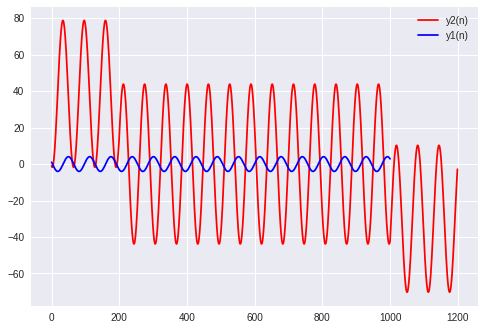

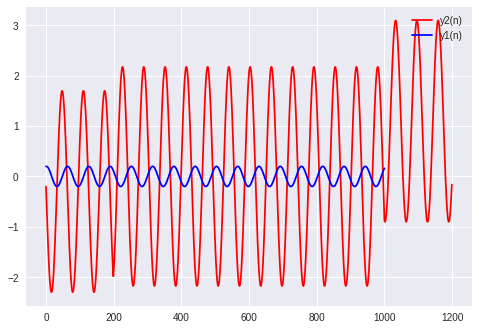

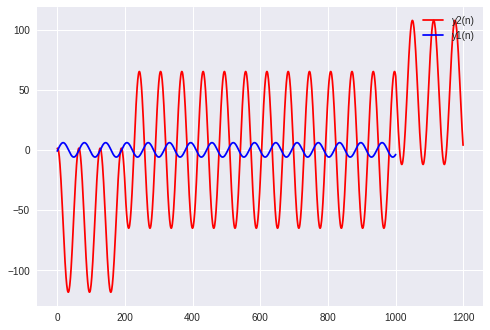

In [64]:
import numpy as np
from math import sin, pi
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def convolution(input1, input2):
  result = [0] * (len(input1) + len(input2) - 1) # create a list with the length of (N+M-1),if the length of input1 is N, the length of input2 is M
  for i in range(len(input1)):   # traverse the list1, named input1
    for j in range(len(input2)): # traverse the list2, named input2
      result[i+j] = result[i+j] + input1[i]*input2[j] 
  return result

# we create a unit step signal with the range of [1,200];
unit = [-1] * 200
export = [0] * 3 # create a list with the length of 3.

for i in range(0,3):
  fig, ax = plt.subplots(1, 1) # nrows = 1, ncols = 1
  export[i] = convolution(result[i],unit)
  ax.plot(export[i], 'r', label = "y2(n)")
  ax.plot(result[i],'b', label = "y1(n)")
  ax.legend(loc=1); # upper left corner
  i += 1  
  